<a href="https://colab.research.google.com/github/j-puthota/devops-essentials-sample-app/blob/master/topic_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let’s first load all the necessary libraries:

In [1]:
import nltk
from nltk import FreqDist
nltk.download('stopwords') # run this one time

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
!pip install PyDrive
!pip install gensim
!pip install pyldavis
!python -m spacy download en

     |████████████████████████████████| 1.6MB 2.7MB/s 
  Created wheel for pyldavis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=48f2f9f1986c7c7aaf68f6ef7fe8abbf3bb2c1c44c234ccb38254ae27bf04bd0
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyldavis
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [4]:

import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import nltk
from nltk import FreqDist
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
import gzip

In [5]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re
import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)
    
def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

In [40]:
df = 'Output - Vectorisation Experiment.csv'


In [41]:
df.head()

AttributeError: ignored

In [44]:
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

In [43]:

freq_words(df['reviewText'])

TypeError: ignored

In [16]:

# replace "n't" with " not"
df['reviewText'] = df['reviewText'].str.replace("n\'t", " not")

# remove unwanted characters, numbers and symbols
df['reviewText'] = df['reviewText'].str.replace("[^a-zA-Z#]", " ")

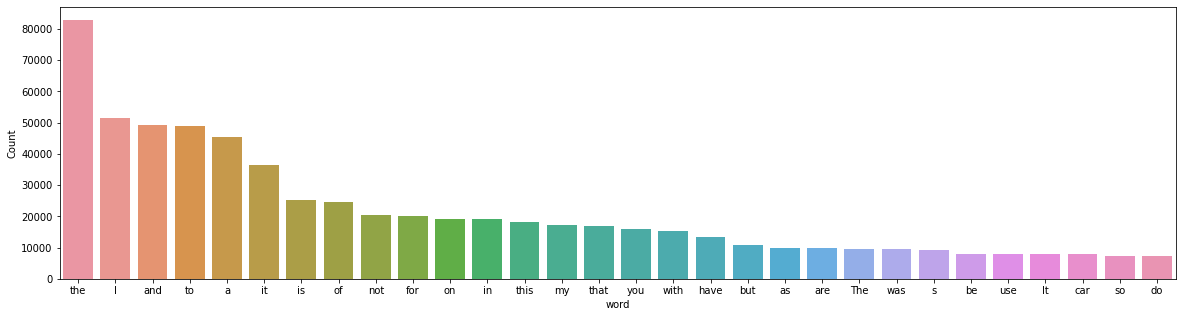

In [17]:
freq_words(df['reviewText'])

In [18]:

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [19]:
# function to remove stopwords
def remove_stopwords(rev):
  rev_new = " ".join([i for i in rev if i not in stop_words])
  return rev_new

In [20]:

# remove short words (length < 3)
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in df['reviewText']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

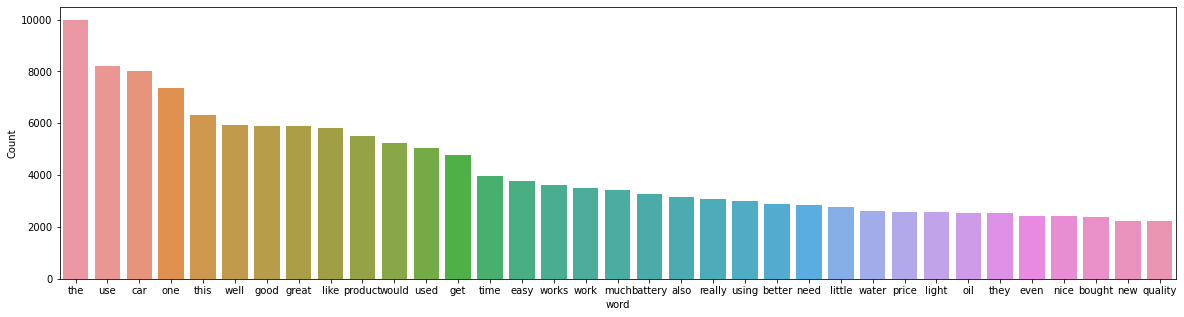

In [21]:
freq_words(reviews, 35)

In [22]:
nlp = spacy.load('en', disable=['parser', 'ner'])

In [24]:

def lemmatization(texts, tags=['NOUN', 'ADJ']):
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

In [25]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['these', 'long', 'cables', 'work', 'fine', 'truck', 'quality', 'seems', 'little', 'shabby', 'side', 'for', 'money', 'expecting', 'dollar', 'snap', 'jumper', 'cables', 'seem', 'like', 'would', 'see', 'chinese', 'knock', 'shop', 'like', 'harbor', 'freight', 'bucks']


In [26]:
print(tokenized_reviews[1])
len(tokenized_reviews[1])

['these', 'long', 'cables', 'work', 'fine', 'truck', 'quality', 'seems', 'little', 'shabby', 'side', 'for', 'money', 'expecting', 'dollar', 'snap', 'jumper', 'cables', 'seem', 'like', 'would', 'see', 'chinese', 'knock', 'shop', 'like', 'harbor', 'freight', 'bucks']


29

In [27]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[1])

['long', 'cable', 'fine', 'truck', 'quality', 'little', 'shabby', 'side', 'money', 'expecting', 'dollar', 'snap', 'jumper', 'cable', 'chinese', 'knock', 'shop', 'harbor', 'freight', 'buck']


In [28]:
print(reviews_2[1])
len(reviews_2[1])

['long', 'cable', 'fine', 'truck', 'quality', 'little', 'shabby', 'side', 'money', 'expecting', 'dollar', 'snap', 'jumper', 'cable', 'chinese', 'knock', 'shop', 'harbor', 'freight', 'buck']


20

In [29]:
set(tokenized_reviews[1]) - set(reviews_2[1])

{'bucks',
 'cables',
 'for',
 'like',
 'see',
 'seem',
 'seems',
 'these',
 'work',
 'would'}

In [30]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))
    
df['reviews'] = reviews_3

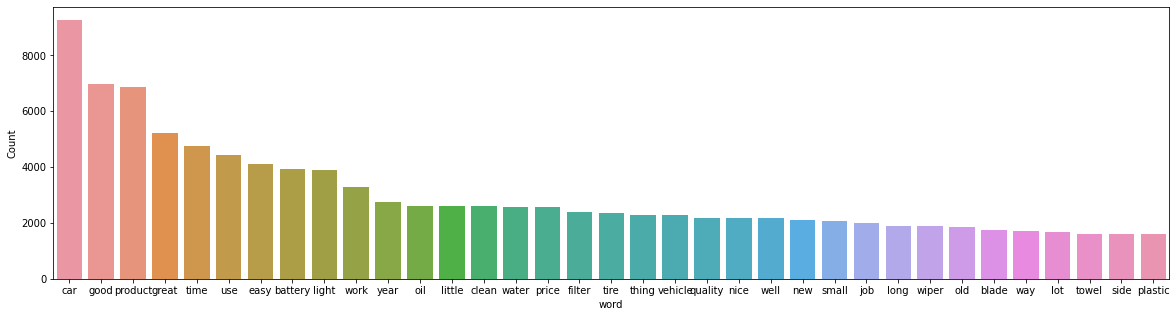

In [32]:
freq_words(df['reviews'], 35)

In [33]:
dictionary = corpora.Dictionary(reviews_2)

In [34]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]

In [35]:
LDA = gensim.models.ldamodel.LdaModel


In [36]:
lda_model = LDA(corpus=doc_term_matrix,
                id2word=dictionary,
                num_topics=7, 
                random_state=100,
                chunksize=1000,
                passes=50)

Streaming output truncated to the last 5000 lines.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Us

In [37]:
lda_model.print_topics()

[(0,
  '0.031*"oil" + 0.024*"car" + 0.022*"filter" + 0.021*"engine" + 0.014*"code" + 0.012*"change" + 0.012*"good" + 0.011*"vehicle" + 0.010*"product" + 0.009*"gas"'),
 (1,
  '0.029*"tire" + 0.020*"hose" + 0.016*"easy" + 0.016*"use" + 0.014*"trailer" + 0.013*"gauge" + 0.013*"pressure" + 0.012*"water" + 0.011*"cable" + 0.011*"plug"'),
 (2,
  '0.048*"car" + 0.035*"product" + 0.022*"towel" + 0.020*"clean" + 0.018*"good" + 0.018*"water" + 0.013*"great" + 0.013*"use" + 0.013*"time" + 0.010*"paint"'),
 (3,
  '0.013*"kit" + 0.012*"tape" + 0.010*"plastic" + 0.008*"small" + 0.008*"product" + 0.007*"instruction" + 0.007*"thing" + 0.007*"bag" + 0.006*"way" + 0.006*"area"'),
 (4,
  '0.050*"light" + 0.028*"wiper" + 0.027*"blade" + 0.020*"bulb" + 0.016*"bright" + 0.013*"good" + 0.013*"easy" + 0.012*"car" + 0.011*"windshield" + 0.010*"install"'),
 (5,
  '0.054*"battery" + 0.031*"car" + 0.026*"power" + 0.021*"device" + 0.019*"light" + 0.017*"unit" + 0.015*"charger" + 0.014*"phone" + 0.013*"charge" + 0